    SVM usable both for classification and regression. 
    Linear and nonlinear(?!) kernels available to use with SVMs
        LSVM (linear SVM) linear classifier with maximum margin. Linear models make strong assumptions about the structure of the data.
        Kernelized SVMs: take the original input data space and transform it to a new higher dimensional feature space, where it becomes much easier to classify the transform to data using a linear classifier.
    
    different choices of kernel correspond to different types of transformations to that higher dimensional feature space.
    
    Classifier margin = maximum width the decision boundary area can be increased before hitting  a datapoint: reward classifiers for the amount of separation that can provide between the two classes. 
    SVMs form combinations of kernels centered at some of the training samples
    
    !!!! MUST HAVE: scaling / feature normalization. SVMs are NOT decision trees :). Important to normalize the input data, so that all the features have comparable units that are on the same scale. 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.datasets import load_iris
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC



from matplotlib.colors import ListedColormap

#from adspy_shared_utilities import plot_feature_importances
#from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
#from adspy_shared_utilities import plot_fruit_knn


    FRUIT DATASET


In [2]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
print (pd.DataFrame(fruits).info())

#feature_names_fruits = ['mass', 'width', 'height']
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
print (lookup_fruit_name)


X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

print (X_fruits.head())
print(y_fruits.head())

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


X_fruits_3d = fruits[['height', 'width', 'mass']]
y_fruits_3d = fruits['fruit_label']


# default is 75% / 25% train-test split
X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits, y_fruits, random_state=0)
#X_train_fruit, X_test_fruit, y_train_fruit, y_test_fruit = train_test_split(X_fruits.values,y_fruits.values, random_state = 0)
X_train_fruit2D, X_test_fruit2D, y_train_fruit2D, y_test_fruit2D = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)
X_train_fruit3D, X_test_fruit3D, y_train_fruit3D, y_test_fruit3D = train_test_split(X_fruits_3d, y_fruits_3d, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None
{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
   height  width  mass  color_score
0     7.3    8.4   192         0.55
1     6.8    8.0   180         0.59
2     7.2    7.4   176         0.60
3     4.7    6.2    86         0.80
4     4.6    6.0    84         0.79
0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64


In [3]:
# all 4 columns used to generate train test datasets 
scaler_fruit = MinMaxScaler()
X_train_scaled_fruit = pd.DataFrame(scaler_fruit.fit_transform(X_train_fruit))
X_train_scaled_fruit.columns = scaler_fruit.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_fruit = pd.DataFrame(scaler_fruit.transform(X_test_fruit))
X_test_scaled_fruit.columns = scaler_fruit.get_feature_names_out()

# 2 columns used to generate train test datasets
scaler_fruit_2D = MinMaxScaler()
X_train_scaled_fruit2D = pd.DataFrame(scaler_fruit_2D.fit_transform(X_train_fruit2D))
X_train_scaled_fruit2D.columns = scaler_fruit_2D.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_fruit2D = pd.DataFrame(scaler_fruit_2D.transform(X_test_fruit2D))
X_test_scaled_fruit2D.columns = scaler_fruit_2D.get_feature_names_out()


# 2 columns used to generate train test datasets
scaler_fruit_3D = MinMaxScaler()
X_train_scaled_fruit3D = pd.DataFrame(scaler_fruit_3D.fit_transform(X_train_fruit3D))
X_train_scaled_fruit3D.columns = scaler_fruit_3D.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_fruit3D = pd.DataFrame(scaler_fruit_3D.transform(X_test_fruit3D))
X_test_scaled_fruit3D.columns = scaler_fruit_3D.get_feature_names_out()

In [4]:
iris = load_iris()
print(pd.DataFrame(iris.data).info())
print (iris.keys())

print (pd.DataFrame(iris.data).head())
print (pd.DataFrame(iris.target).head())


X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, 
                                                                        iris.target, 
                                                                        random_state = 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
   0
0  0
1  0
2  0
3  0
4  0


In [5]:
iris_2d = pd.DataFrame(iris.data).loc[:,0:1]

X_train_iris_2D, X_test_iris_2D, y_train_iris_2D, y_test_iris_2D = train_test_split(iris_2d, 
                                                                                    iris.target, 
                                                                                    random_state = 3)
# no further scaling is needed , ranges are similar

In [6]:
iris_3d = pd.DataFrame(iris.data).loc[:,0:2]

X_train_iris_3D, X_test_iris_3D, y_train_iris_3D, y_test_iris_3D = train_test_split(iris_3d, 
                                                                                    iris.target, 
                                                                                    random_state = 3)
# no further scaling is needed , ranges are similar

In [7]:
scaler_iris = MinMaxScaler()
X_train_scaled_iris = pd.DataFrame(scaler_iris.fit_transform(X_train_iris))
X_train_scaled_iris.columns = scaler_iris.get_feature_names_out()
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled_iris = pd.DataFrame(scaler_iris.transform(X_test_iris))
X_test_scaled_iris.columns = scaler_iris.get_feature_names_out()

# SVM MULTICLASS CLASSIFICATION

# FRUIT DATASET: 2, 3 , 4 input features to train the model
    fails to converge with 4D ==> GATHERING MORE FEATURES CAN HURT!!! 
    poorer train-test accuracy with 3d than with 2D
    
    Curse of dimensionality: the similarity based reasoning that ML algorithms depend on breaks down in high dimensions (e.g. KNN Hamming distance , 100 input features, 98 which are irrelevant BUT introduce noise that completely swamps the signal in the two relevant input features, effectively causing KNN tomake random predictions)
            most of the volume of a high dimensional orange is in the skin not the pulp. and if we approximate a hypersphere by inscribing it in a hypercube, in high dimensions most of the volume of the hypercube is outside the hypersphere
            
            naively one might think that gathering more features never hurts since at worst they provide no new info about the class. But in fact their benefits may be outweighted by the curse of dimensionality. 

    FRUIT DATASET 2D (width height columns, no ?! feature scaling)

Coefficients:
 [[-0.2818132   0.64252173]
 [-1.64037757  1.15840067]
 [-0.01104819  0.33191386]
 [ 1.24079424 -1.73050637]]
Intercepts:
 [-2.71436638  1.2119402  -2.74553543  1.67999536]
{'C': 5, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 67, 'tol': 0.0001, 'verbose': 0}
SVM, Fruit dataset 2 dimensions, no feature normalization
Accuracy of SVMClassifier on training set: 0.75
Accuracy of SVMClassifier  on test set: 0.47


<IPython.core.display.Javascript object>


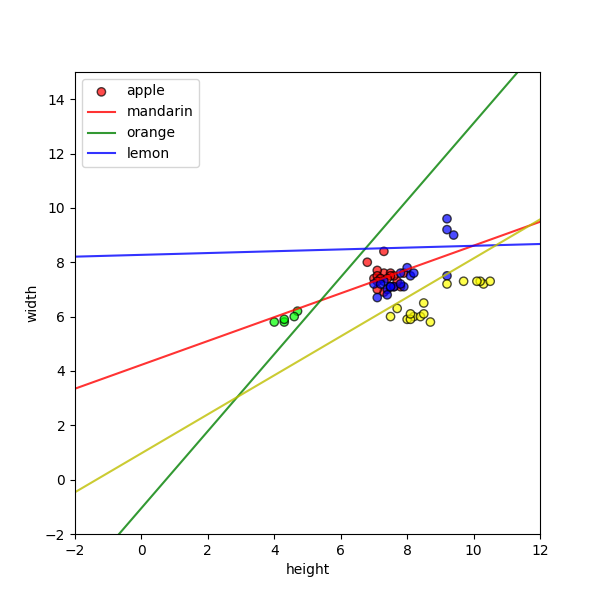

In [8]:
#clf = LinearSVC(C=5, random_state = 67, max_iter= 50000).fit(X_train_scaled_fruit2D, y_train_fruit2D)
clf = LinearSVC(C=5, random_state = 67, max_iter= 50000).fit(X_train_fruit2D, y_train_fruit2D)


print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print (clf.get_params(deep = True))

print('SVM, Fruit dataset 2 dimensions, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit2D, y_train_fruit2D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_fruit2D, y_test_fruit2D)))

plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()


    PREDICTION EXAMPLE / SVM ON FRUIT DATASET 2D


In [9]:
#example_fruit = pd.DataFrame([[5.5, 2.2, 10, 0.70]])
example_fruit = pd.DataFrame([[5.5, 2.2]]) # height and witdh used for prediction
example_fruit.columns = feature_names_fruits[0:2]
example_fruit_scaled = pd.DataFrame(scaler_fruit_2D.transform(example_fruit))
example_fruit_scaled.columns = scaler_fruit_2D.get_feature_names_out()
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[clf.predict(example_fruit_scaled)[0]-1])

Predicted fruit type for     height  width
0     5.5    2.2  is  lemon


In [10]:
print ("PREDICTIONS")
predictions = clf.predict(X_test_fruit2D)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_fruit, return_counts=True)
print (pd.DataFrame(counts, unique))

PREDICTIONS
    0
1  12
2   1
4   2

TEST SET TARGET
   0
1  4
2  1
3  8
4  2


    FRUIT DATASET 3D

Coefficients:
 [[-0.12112969  1.15745636 -0.01269447]
 [-0.32274829  0.87703095 -0.03608445]
 [-0.27095231 -0.47962048  0.02309397]
 [ 2.03220116 -1.39386589 -0.04311816]]
Intercepts:
 [-5.63536977  0.17513418  1.32750579 -0.15775   ]
{'C': 5, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 67, 'tol': 0.0001, 'verbose': 0}
SVM, Fruit dataset, 3 features, no feature normalization
Accuracy of SVMClassifier on training set: 0.84
Accuracy of SVMClassifier  on test set: 0.40


<IPython.core.display.Javascript object>


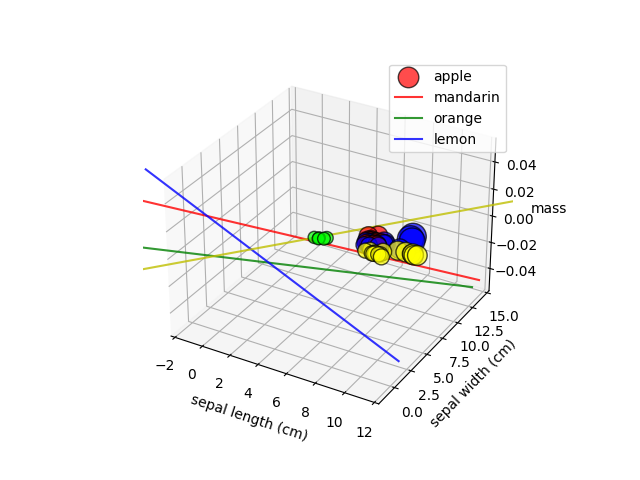

In [11]:
clf = LinearSVC(C=5, 
                random_state = 67, 
                max_iter= 50000, 
                dual = False, 
                class_weight="balanced").fit(X_train_fruit3D, y_train_fruit3D)

print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print (clf.get_params(deep = True))

print('SVM, Fruit dataset, 3 features, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit3D, y_train_fruit3D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_fruit3D, y_test_fruit3D)))

#plt.figure(figsize=(6,6))
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_3d[['height']], X_fruits_3d[['width']],X_fruits_3d[['mass']],
           c=y_fruits_3d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)


for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)

ax.set_xlabel('height')
ax.set_ylabel('width')
ax.set_zlabel('mass')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()



    PREDICTION EXAMPLE: FRUIT DATASET 3D (3 input features for training the model)

In [12]:
print ("target_names_fruits ", target_names_fruits)
#example_fruit = pd.DataFrame([[5.5, 2.2, 10, 0.70]])
example_fruit = pd.DataFrame([[5.5, 2.2, 10]]) # height witdh mass used for prediction
example_fruit.columns = feature_names_fruits[0:3]
example_fruit_scaled = pd.DataFrame(scaler_fruit_3D.transform(example_fruit))
example_fruit_scaled.columns = scaler_fruit_3D.get_feature_names_out()

prediction = clf.predict(example_fruit_scaled)
print ("prediction: ", prediction)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[clf.predict(example_fruit_scaled)[0]-1])

target_names_fruits  ['apple', 'mandarin', 'orange', 'lemon']
prediction:  [4]
Predicted fruit type for     height  width  mass
0     5.5    2.2    10  is  lemon


In [13]:
print ("PREDICTIONS")
predictions = clf.predict(X_test_fruit3D)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_fruit, return_counts=True)
print (pd.DataFrame(counts, unique))

PREDICTIONS
   0
1  7
2  1
3  5
4  2

TEST SET TARGET
   0
1  4
2  1
3  8
4  2


In [14]:
clf = LinearSVC(C=1, random_state = 67, max_iter= 1000000).fit(X_train_fruit, 
                                                             y_train_fruit)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print (clf.get_params(deep = True))

print('SVM, Fruit dataset')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_fruit, y_train_fruit)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_fruit, y_test_fruit)))

Coefficients:
 [[-0.23622386  0.69725738 -0.0051258  -0.79774509]
 [-0.27343687  0.77415298 -0.03378195  0.15168316]
 [-0.22607769 -0.36774555  0.01991487  0.55844536]
 [ 1.27617342 -0.9207376  -0.02449085 -0.1794201 ]]
Intercepts:
 [-1.95803119  0.16230544  0.2657722  -0.09944982]
{'C': 1, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 67, 'tol': 0.0001, 'verbose': 0}
SVM, Fruit dataset
Accuracy of SVMClassifier on training set: 0.82
Accuracy of SVMClassifier  on test set: 0.47


/Users/corinapostelnicu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


    ==> Fails to converge with 4 input features

# IRIS DATASET: 2 , 3 , 4 input features to train the model

In [15]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


    IRIS 2D: two input features to train the model

Coefficients:
 [[-2.15155963  3.24085308]
 [-0.01066225 -1.13784703]
 [ 0.81869571 -0.21376458]]
Intercepts:
 [ 1.39411604  3.19994144 -4.47042161]
{'C': 5, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 67, 'tol': 0.0001, 'verbose': 0}
SVM, Iris dataset, 2 features, no feature normalization
Accuracy of SVMClassifier on training set: 0.82
Accuracy of SVMClassifier  on test set: 0.79


<IPython.core.display.Javascript object>


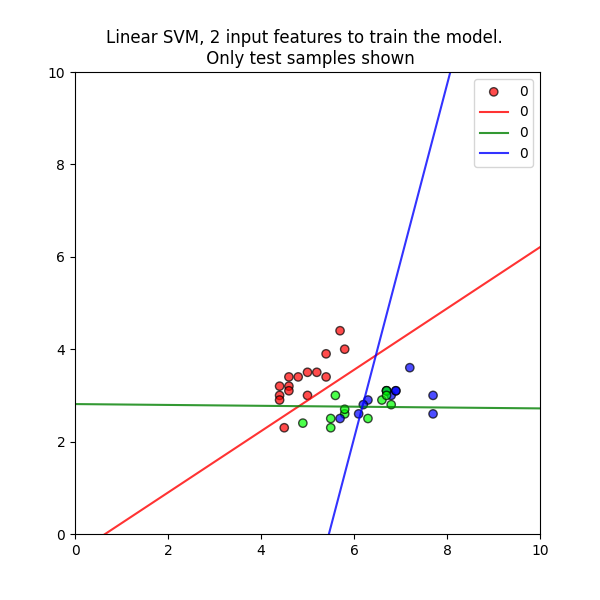

------------------------------------------
PREDICTIONS
    0
0  14
1  10
2  14

TEST SET TARGET
    0
0  15
1  12
2  11


In [16]:
clf = LinearSVC(C=5, 
                random_state = 67, 
                max_iter= 50000, 
                #dual = False, 
                #class_weight="balanced"
               ).fit(X_train_iris_2D, y_train_iris_2D)

# apply to scaled version needed here? maybe not

print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print (clf.get_params(deep = True))

print('SVM, Iris dataset, 2 features, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_iris_2D, y_train_iris_2D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_iris_2D, y_test_iris_2D)))

plt.figure(figsize=(6,6))
plt.title ('Linear SVM, 2 input features to train the model. \n Only test samples shown')
#fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
colors = ['r', 'g', 'b']
cmap_iris = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#plt.scatter(iris_df[iris.feature_names[0]], iris_df[iris.feature_names[1]],
    # c=iris.target, cmap=cmap_iris, edgecolor = 'black', alpha=.7)
plt.scatter(X_test_iris_2D.loc[:,X_test_iris_2D.columns[0]], X_test_iris_2D.loc[:,X_test_iris_2D.columns[1]],
            c=y_test_iris_2D, cmap=cmap_iris, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(0,10)
for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot( x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(iris.target)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()


print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_iris_2D)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris_2D, return_counts=True)
print (pd.DataFrame(counts, unique))



      SVM good accuracy, poor visualization ==> probably was trained for more input features than visible 

    IRIS 3D: 3 input features to train the model

Coefficients:
 [[ 0.0709767   0.70432511 -1.03378628]
 [ 0.07235927 -1.19409393 -0.04635178]
 [-0.99936098 -0.8976884   2.62453347]]
Intercepts:
 [ 0.0601379   3.0650813  -4.02677546]
{'C': 5, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 67, 'tol': 0.0001, 'verbose': 0}
SVM, Iris dataset, 3 features, no feature normalization (ranges are similar)
Accuracy of SVMClassifier on training set: 0.97
Accuracy of SVMClassifier  on test set: 0.97


<IPython.core.display.Javascript object>


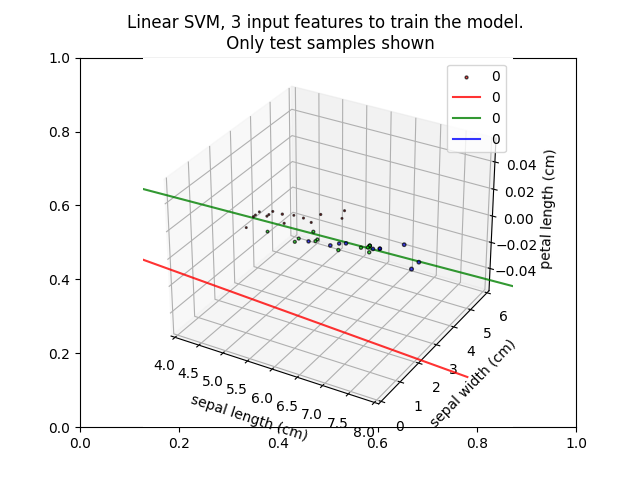

------------------------------------------
PREDICTIONS
    0
0  15
1  13
2  10

TEST SET TARGET
    0
0  15
1  12
2  11


In [17]:
clf = LinearSVC(C=5, 
                random_state = 67, 
                max_iter= 50000, 
                #dual = False, 
                #class_weight="balanced"
               ).fit(X_train_iris_3D, y_train_iris_3D)

# apply to scaled version needed here? maybe not
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print (clf.get_params(deep = True))

print('SVM, Iris dataset, 3 features, no feature normalization (ranges are similar)')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_iris_3D, y_train_iris_3D)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_iris_3D, y_test_iris_3D)))

#plt.figure(figsize=(6,6))
fig = plt.figure()
plt.title ('Linear SVM, 3 input features to train the model. \n Only test samples shown')
ax = fig.add_subplot(111, projection = '3d')
colors = ['r', 'g', 'b']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


plt.scatter(X_test_iris_3D.loc[:,X_test_iris_3D.columns[0]], 
            X_test_iris_3D.loc[:,X_test_iris_3D.columns[1]],
            X_test_iris_3D.loc[:,X_test_iris_3D.columns[2]],
            c=y_test_iris_3D, cmap=cmap_iris, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(0,10)
for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(iris.target)


ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
plt.xlim(4, 8)
plt.ylim(0,6)
plt.show()

print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_iris_3D)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris_3D, return_counts=True)
print (pd.DataFrame(counts, unique))


    IRIS ALL 4 input features to train the model

In [18]:
# scaled 
clf = LinearSVC(C=5, 
                random_state = 67, 
                max_iter= 50000, 
                #dual = False, 
                #class_weight="balanced"
               ).fit(X_train_scaled_iris, y_train_iris)


print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print (clf.get_params(deep = True))

print('SVM, Iris dataset, 3 features, WITH feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled_iris, y_train_iris)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_scaled_iris, y_test_iris)))


print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_scaled_iris)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris, return_counts=True)
print (pd.DataFrame(counts, unique))




Coefficients:
 [[-0.63474289  1.77890945 -1.91050034 -1.8472465 ]
 [-0.63159521 -2.21234302  2.18605761 -1.84431695]
 [-0.21335598 -1.74397359  3.72076431  4.73382548]]
Intercepts:
 [ 0.41600874  0.78503911 -4.75393988]
{'C': 5, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 67, 'tol': 0.0001, 'verbose': 0}
SVM, Iris dataset, 3 features, WITH feature normalization
Accuracy of SVMClassifier on training set: 0.94
Accuracy of SVMClassifier  on test set: 0.92
------------------------------------------
PREDICTIONS
    0
0  14
1  13
2  11

TEST SET TARGET
    0
0  15
1  12
2  11


In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:



# unscaled 
clf = LinearSVC(C=5, 
                random_state = 67, 
                max_iter= 50000, 
                #dual = False, 
                #class_weight="balanced"
               ).fit(X_train_iris, y_train_iris)


print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)
print (clf.get_params(deep = True))

print('SVM, Iris dataset, 3 features, no feature normalization')
print('Accuracy of SVMClassifier on training set: {:.2f}'
     .format(clf.score(X_train_iris, y_train_iris)))
print('Accuracy of SVMClassifier  on test set: {:.2f}'
     .format(clf.score(X_test_iris, y_test_iris)))


print ("------------------------------------------")
print ("PREDICTIONS")
predictions = clf.predict(X_test_iris)

unique, counts = np.unique(predictions, return_counts=True)
print (pd.DataFrame(counts, unique))


print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_iris, return_counts=True)
print (pd.DataFrame(counts, unique))


setosa_train_X = X_train_iris[y_train_iris==0]
setosa_train_y = y_train_iris[y_train_iris==0]
versicolor_train_X = X_train_iris[y_train_iris==1]
versicolor_train_y = y_train_iris[y_train_iris==1]
virginica_train_X = X_train_iris[y_train_iris==2]
virginica_train_y = y_train_iris[y_train_iris==2]

setosa_test_X = X_test_iris[y_test_iris==0]
setosa_test_y = y_test_iris[y_test_iris==0]
versicolor_test_X = X_test_iris[y_test_iris==1]
versicolor_test_y = y_test_iris[y_test_iris==1]
virginica_test_X = X_test_iris[y_test_iris==2]
virginica_test_y = y_test_iris[y_test_iris==2]

# Find the training and testing accuracies by target value (i.e. malignant, benign)
scores_iris = [clf.score(setosa_train_X, setosa_train_y), 
          clf.score(versicolor_train_X, versicolor_train_y),
          clf.score(virginica_train_X, virginica_train_y),
          clf.score(setosa_test_X, setosa_test_y), 
          clf.score(versicolor_test_X, versicolor_test_y), 
          clf.score(virginica_test_X, virginica_test_y)]

Coefficients:
 [[ 0.10602408  0.61920683 -0.86007682 -0.42235924]
 [-0.24077255 -0.89743619  0.55116956 -1.06776026]
 [-0.7135493  -1.23355838  1.57117262  2.25690188]]
Intercepts:
 [ 0.02502465  3.01857353 -3.41140142]
{'C': 5, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 50000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 67, 'tol': 0.0001, 'verbose': 0}
SVM, Iris dataset, 3 features, no feature normalization
Accuracy of SVMClassifier on training set: 0.97
Accuracy of SVMClassifier  on test set: 0.97
------------------------------------------
PREDICTIONS
    0
0  15
1  11
2  12

TEST SET TARGET
    0
0  15
1  12
2  11


In [21]:
def accuracy_plot_iris(scores):
    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(6), 
                   scores, 
                   color=['#4c72b0','#4c72b0','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3,4,5], ['Setosa\nTraining', 'Versicolor\nTraining', 'Virginica\nTraining','Setosa\nTest', 'Versicolor\nTest', 'Virginica\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Setosa, Versicolor and Virginica iris species', alpha=0.8)

<IPython.core.display.Javascript object>


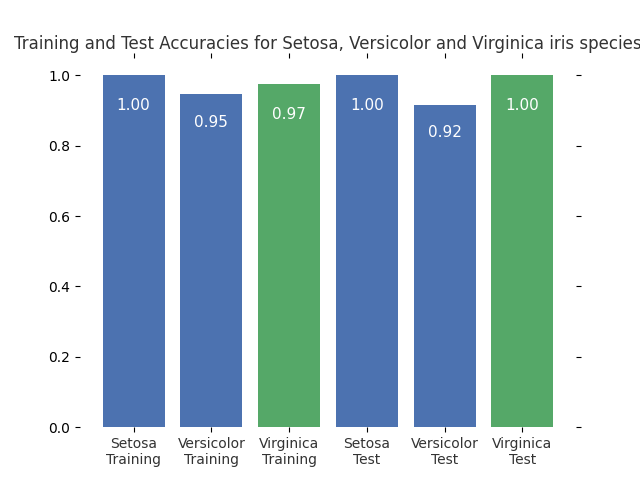

In [22]:
# works with unscaled version of the test / training sets
accuracy_plot_iris(scores_iris)

---
 # REAL WORLD DATASET: BREAST CANCER 
    
---

In [23]:
from sklearn.datasets import load_breast_cancer
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print ("Type of data structure: ", type(cancer))
print ("Keys: ", cancer.keys())
print ("Feature names: ", cancer["feature_names"])

# convert to dataframe
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf['target'] = pd.Series(cancer.target)
counts = cancerdf.target.value_counts(ascending=True)
counts.index = "malignant benign".split()
print ("Distribution of labelled samples: ")
print(counts)
print ("-------------------------------------------")
print (cancerdf.head(5))

Type of data structure:  <class 'sklearn.utils.Bunch'>
Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Distribution of labelled samples: 
malignant    212
benign       357
Name: target, dtype: int64
-------------------------------------------
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.8

    BREAST CANCER 2 dimensions

    BREAST CANCER 2:10 dimensions

<IPython.core.display.Javascript object>


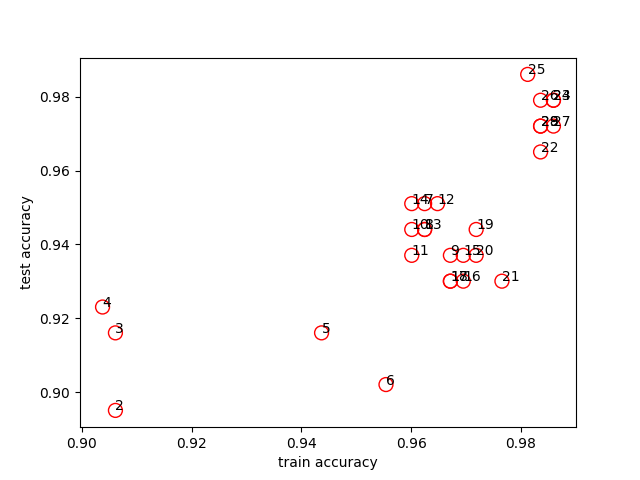

---------------------
[0.9061032863849765, 0.9061032863849765, 0.903755868544601, 0.9436619718309859, 0.9553990610328639, 0.9624413145539906, 0.9624413145539906, 0.9671361502347418, 0.960093896713615, 0.960093896713615, 0.9647887323943662, 0.9624413145539906, 0.960093896713615, 0.9694835680751174, 0.9694835680751174, 0.9671361502347418, 0.9671361502347418, 0.971830985915493, 0.971830985915493, 0.9765258215962441, 0.9835680751173709, 0.9859154929577465, 0.9859154929577465, 0.9812206572769953, 0.9835680751173709, 0.9859154929577465, 0.9835680751173709, 0.9835680751173709]
[0.8951048951048951, 0.916083916083916, 0.9230769230769231, 0.916083916083916, 0.9020979020979021, 0.951048951048951, 0.9440559440559441, 0.9370629370629371, 0.9440559440559441, 0.9370629370629371, 0.951048951048951, 0.9440559440559441, 0.951048951048951, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9440559440559441, 0.9370629370629371, 0.9300699300699301, 0.965034965034965, 0.979020

In [24]:
n_dimensions_range = range(2,30)

train_scores = []
test_scores = []

for n_dimensions in n_dimensions_range:
    
    X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer[:,:n_dimensions], 
                                                                    y_cancer, 
                                                                    random_state = 0)
    scaler_BC = MinMaxScaler()
    X_train_scaled_BC = scaler_BC.fit_transform(X_train_BC)
    X_test_scaled_BC = scaler_BC.transform(X_test_BC)

    clf = SVC(C=1).fit(X_train_scaled_BC, y_train_BC)
   
    train_scores.append(clf.score(X_train_scaled_BC, y_train_BC))
    test_scores.append(clf.score(X_test_scaled_BC, y_test_BC))

plt.figure()
#plt.xlabel('k')
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
#plt.scatter(k_range, scores)
plt.scatter(train_scores, test_scores, 
            s= 100, 
            facecolors='none', 
            edgecolors='r')
#plt.xticks([0,.2,.4,.6,.8, 1]);
#plt.yticks([0,.2,.4,.6,.8, 1]);

for i, label in enumerate(n_dimensions_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("---------------------")
print (train_scores)
print(test_scores)





In [25]:
n_dimensions = 25
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer[:,:n_dimensions], y_cancer, random_state = 0)

scaler_BC = MinMaxScaler()
X_train_scaled_BC = scaler_BC.fit_transform(X_train_BC)
X_test_scaled_BC = scaler_BC.transform(X_test_BC)

clf = SVC(C=10).fit(X_train_scaled_BC, y_train_BC)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled_BC, y_train_BC)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled_BC, y_test_BC)))

print ("PREDICTIONS")
predictions = clf.predict(X_test_scaled_BC)
print("no cancer: {0}".format(len(predictions[predictions==0])))
print("cancer: {0}".format(len(predictions[predictions==1])))

print ("")
print ("TEST SET TARGET")
unique, counts = np.unique(y_test_BC, return_counts=True)
pd.DataFrame(counts, unique)

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.98
PREDICTIONS
no cancer: 50
cancer: 93

TEST SET TARGET


,0
0,53
1,90


In [26]:
[0.01, 0.1, 1, 10, 100, 1000]

[0.01, 0.1, 1, 10, 100, 1000]

<IPython.core.display.Javascript object>


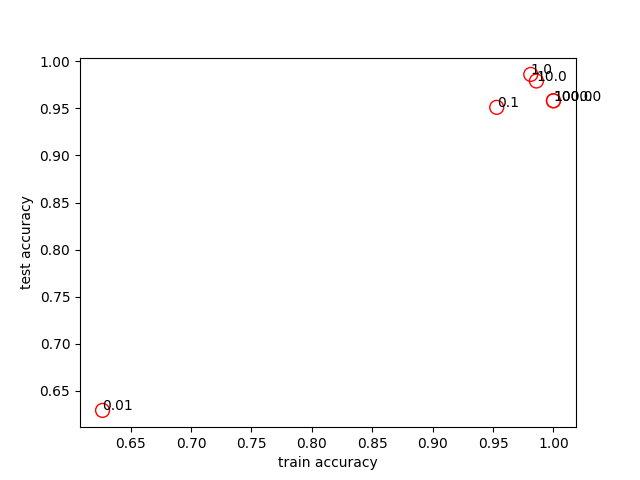

---------------------
[0.6267605633802817, 0.9530516431924883, 0.9812206572769953, 0.9859154929577465, 1.0, 1.0]
[0.6293706293706294, 0.951048951048951, 0.986013986013986, 0.9790209790209791, 0.958041958041958, 0.958041958041958]


In [27]:
C_range = np.array([0.01, 0.1, 1, 10, 100, 1000])

X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_cancer[:,:25], 
                                                                    y_cancer, 
                                                                    random_state = 0)
scaler_BC = MinMaxScaler()
X_train_scaled_BC = scaler_BC.fit_transform(X_train_BC)
X_test_scaled_BC = scaler_BC.transform(X_test_BC)

train_scores = []
test_scores = []

for crt_C in C_range:
    clf = SVC(C=crt_C).fit(X_train_scaled_BC, y_train_BC)
   
    train_scores.append(clf.score(X_train_scaled_BC, y_train_BC))
    test_scores.append(clf.score(X_test_scaled_BC, y_test_BC))

plt.figure()
#plt.xlabel('k')
plt.xlabel('train accuracy')
plt.ylabel('test accuracy')
#plt.scatter(k_range, scores)
plt.scatter(train_scores, test_scores, 
            s= 100, 
            facecolors='none', 
            edgecolors='r')
#plt.xticks([0,.2,.4,.6,.8, 1]);
#plt.yticks([0,.2,.4,.6,.8, 1]);

for i, label in enumerate(C_range):
    plt.annotate(label, (train_scores[i], test_scores[i]))

print ("---------------------")
print (train_scores)
print(test_scores)

In [28]:
mal_train_X = X_train_BC[y_train_BC==0]
mal_train_y = y_train_BC[y_train_BC==0]
ben_train_X = X_train_BC[y_train_BC==1]
ben_train_y = y_train_BC[y_train_BC==1]

mal_test_X = X_test_BC[y_test_BC==0]
mal_test_y = y_test_BC[y_test_BC==0]
ben_test_X = X_test_BC[y_test_BC==1]
ben_test_y = y_test_BC[y_test_BC==1]

# Find the training and testing accuracies by target value (i.e. malignant, benign)
scores = [clf.score(mal_train_X, mal_train_y), 
          clf.score(ben_train_X, ben_train_y),
          clf.score(mal_test_X, mal_test_y), 
          clf.score(ben_test_X, ben_test_y)]

In [29]:
def accuracy_plot(scores):
    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<IPython.core.display.Javascript object>


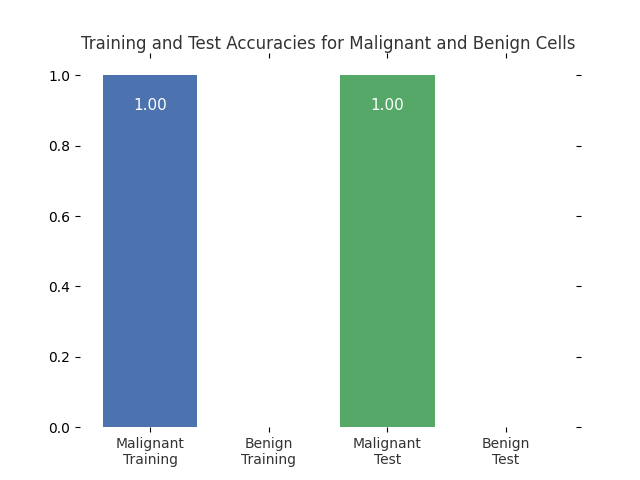

In [30]:
accuracy_plot(scores) 

---
EVALUATION: train-test accuracy as a function of .... Crossvalidation
---